# **Predicción de Precios de Vehículos Usados (Core)**

### **Implementar y evaluar modelos de regresión, y seleccionar el mejor modelo basado en las métricas de evaluación.**

### **1. Carga y Exploración de Datos:**

- Descargar y cargar el dataset.
- Realizar una exploración inicial para entender la estructura del dataset.
- Identificar valores faltantes, duplicados y outliers.

In [1]:
# Se importan las librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

**Descargar y cargar el dataset.**

In [2]:
# Se cargan los datos
# El datasets tiene problemas, por lo que cambie el motor e hice que saltara las lineas malas (que vienen con problemas)
df = pd.read_csv("vehicles.csv", engine='python', on_bad_lines='skip')

**Realizar una exploración inicial para entender la estructura del dataset.**

In [3]:
# Despliego informacion del Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14692 entries, 0 to 14691
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            14692 non-null  int64  
 1   url           14692 non-null  object 
 2   region        14692 non-null  object 
 3   region_url    14692 non-null  object 
 4   price         14692 non-null  int64  
 5   year          14548 non-null  float64
 6   manufacturer  13994 non-null  object 
 7   model         14494 non-null  object 
 8   condition     8486 non-null   object 
 9   cylinders     9688 non-null   object 
 10  fuel          14546 non-null  object 
 11  odometer      14607 non-null  float64
 12  title_status  14384 non-null  object 
 13  transmission  14607 non-null  object 
 14  VIN           9668 non-null   object 
 15  drive         10384 non-null  object 
 16  size          3927 non-null   object 
 17  type          11984 non-null  object 
 18  paint_color   11255 non-nu

In [5]:
# Despliego los primeros 10 registros para ver los datos
df.head(10)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
5,7222379453,https://hudsonvalley.craigslist.org/cto/d/west...,hudson valley,https://hudsonvalley.craigslist.org,1600,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
6,7221952215,https://hudsonvalley.craigslist.org/cto/d/west...,hudson valley,https://hudsonvalley.craigslist.org,1000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
7,7220195662,https://hudsonvalley.craigslist.org/cto/d/poug...,hudson valley,https://hudsonvalley.craigslist.org,15995,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
8,7209064557,https://medford.craigslist.org/cto/d/grants-pa...,medford-ashland,https://medford.craigslist.org,5000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,or,NaN,NaN,NaN
9,7219485069,https://erie.craigslist.org/cto/d/erie-2012-su...,erie,https://erie.craigslist.org,3000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,pa,NaN,NaN,NaN


In [6]:
# Obtengo el listado de columnas del dataframe
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [7]:
# Elimino columnas que no se utilizaran, por corresponder al Identificador, descripcion o URLs y otras que no utilizare en mis modelos
df.drop(columns="id", inplace=True)
df.drop(columns="url", inplace=True)
df.drop(columns="region_url", inplace=True)
df.drop(columns="image_url", inplace=True)
df.drop(columns="description", inplace=True)
df.drop(columns="lat", inplace=True)
df.drop(columns="long", inplace=True)
df.drop(columns="posting_date", inplace=True)


# Tambien borro estas columnas que no se utilizaran

df.drop(columns="county", inplace=True)  # solo tiene 6120 valores
df.drop(columns="size", inplace=True)   # no tiene valores

In [8]:
# Obtengo la cantidad de registros y columnas restantes
df.shape

(14692, 16)

In [9]:
# Miro los primeros restros para ver los datos
df.head(5)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,type,paint_color,state
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


Se aprecian muchos valores NaN, los cuales se deben tratar

**Identificar valores faltantes, duplicados y outliers**

In [10]:
# Identifico valores faltantes
df.isna().sum()

,0
region,0
price,0
year,144
manufacturer,698
model,198
condition,6206
cylinders,5004
fuel,146
odometer,85
title_status,308


Existen columnas que tienen muchos valores nulos... tomare la decision de borrar todas las que tengan mas de 120.000 valores nulos, pues la imputacion de estos podria causarme errores o malas predicciones

In [11]:
# borrare las siquientes columnas por tener muchos valores nulos
df.drop(columns="condition", inplace=True)
df.drop(columns="cylinders", inplace=True)
df.drop(columns="VIN", inplace=True)
df.drop(columns="drive", inplace=True)
df.drop(columns="paint_color", inplace=True)


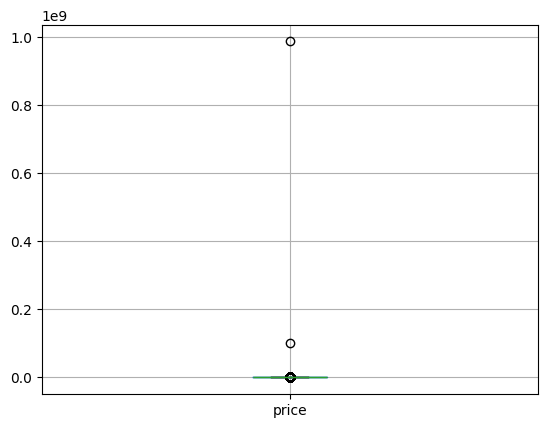

In [12]:
# Grafico un botplot para ver outlier de price
df.boxplot(column="price")
plt.show()


Existen algunos valores outlier, pero por tratarse de precios de automoviles, estos pueden ser valores reales, dependiendo de las marcas y modelos

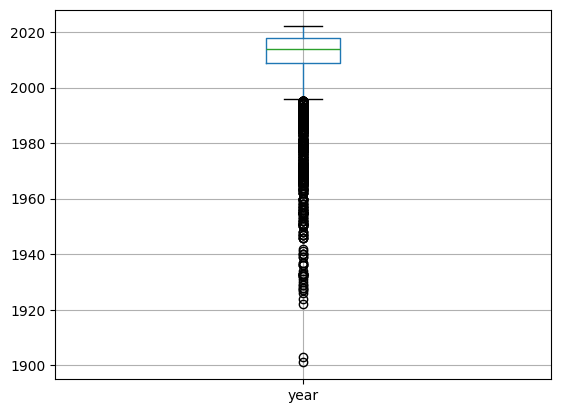

In [13]:
# Grafico un botplot para ver outlier de price
df.boxplot(column="year")
plt.show()

Existen mucho valores outliers, pero por tratarse de precios de vehiculos, y por la antiguedad de la informacion, los precios no corresponden con los de la epoca actual, lo que podria ser la causa de estos valores

In [14]:
# reviso la estadistica de Year, pues muchos valores son outlier y muchos cercanos a 1900
df["year"].describe()

,year
count,14548.000000
mean,2011.572931
std,10.314061
min,1901.000000
25%,2009.000000
50%,2014.000000
75%,2018.000000
max,2022.000000


Me basare en predecir la venta de autos sobre el año 2018, por lo que eliminare todos los registros previos a este año.

Esta opcion lo hago debido a que al entrenar KNN se queda muchas horas y no termina, incluso me para la sesion de Colab.

In [15]:
# elimino registros de automoviles menores al año 2018
df = df[df["year"] >= 2018]


In [16]:
# valido nulos nuevamente
df.isna().sum()


,0
region,0
price,0
year,0
manufacturer,50
model,13
fuel,6
odometer,8
title_status,22
transmission,0
type,412


### **2. Limpieza y Preprocesamiento:**

- Manejar valores faltantes.
- Eliminar duplicados.
- Corregir inconsistencias en los datos categóricos.
- Escalar las características numéricas.
- Realizar transformaciones necesarias para las características categóricas.

In [17]:
# miro los datos actuales
df.head()

,region,price,year,manufacturer,model,fuel,odometer,title_status,transmission,type,state
29,auburn,39590,2020.0,chevrolet,silverado 1500 crew,gas,19160.0,clean,other,pickup,al
34,auburn,35000,2019.0,toyota,tacoma,gas,43000.0,clean,automatic,truck,al
44,auburn,30990,2019.0,ford,ranger supercrew xl pickup,other,1834.0,clean,other,pickup,al
45,auburn,27990,2018.0,nissan,frontier crew cab pro-4x,gas,37332.0,clean,other,pickup,al
47,auburn,34590,2018.0,ford,f150 super cab xl pickup 4d,gas,20856.0,clean,other,pickup,al


In [18]:
# reemplazare NaN del campo manufacturer basandome en el primer registro que encuerntre en model
df["manufacturer"].fillna(df["model"].map(df.groupby("model")["manufacturer"].first()), inplace=True)


/tmp/ipython-input-18-2182080705.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["manufacturer"].fillna(df["model"].map(df.groupby("model")["manufacturer"].first()), inplace=True)


In [19]:
# reemplazare Nan del campo model basandome en el primer registro que encuerntre en manufacturer
df["model"].fillna(df["manufacturer"].map(df.groupby("manufacturer")["model"].first()), inplace=True)


/tmp/ipython-input-19-663685274.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["model"].fillna(df["manufacturer"].map(df.groupby("manufacturer")["model"].first()), inplace=True)


In [20]:
# reemplazare Nan del campo fuel basandome en la moda que encuerntre agrupando por manufacturer y model
df["fuel"].fillna(df.groupby(["manufacturer", "model"])["fuel"].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan), inplace=True)

/tmp/ipython-input-20-2910992923.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["fuel"].fillna(df.groupby(["manufacturer", "model"])["fuel"].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan), inplace=True)


In [21]:
# reemplazare odometer por el promedio, por year
df["odometer"].fillna(df.groupby("year")["odometer"].transform("mean"), inplace=True)

/tmp/ipython-input-21-2481635311.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["odometer"].fillna(df.groupby("year")["odometer"].transform("mean"), inplace=True)


In [22]:
# reemplarare title_status por la moda
df["title_status"].fillna(df["title_status"].mode()[0], inplace=True)

/tmp/ipython-input-22-4139174853.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["title_status"].fillna(df["title_status"].mode()[0], inplace=True)


In [23]:
# reemplazare transmission por la moda agrupada por manufacturer y model
df["transmission"].fillna(df.groupby(["manufacturer", "model"])["transmission"].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan), inplace=True)


/tmp/ipython-input-23-1575770236.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["transmission"].fillna(df.groupby(["manufacturer", "model"])["transmission"].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan), inplace=True)


In [24]:
# reemplazare type por la moda agrupada por manufacturer y model
df["type"].fillna(df.groupby(["manufacturer", "model"])["type"].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan), inplace=True)

/tmp/ipython-input-24-601884294.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["type"].fillna(df.groupby(["manufacturer", "model"])["type"].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan), inplace=True)


**Eliminar duplicados.**

In [25]:
# Busco registros duplicados
df.duplicated().sum()

np.int64(666)

In [26]:
# Borro registros duplicados
df.drop_duplicates(inplace=True)

**Corregir inconsistencias en los datos categóricos.**

In [27]:
# Corregir inconsistencias en los datos categóricos.
df["manufacturer"].unique()

array(['chevrolet', 'toyota', 'ford', 'nissan', 'jeep', 'mazda',
       'cadillac', 'ram', 'honda', 'jaguar', 'buick', 'lexus', 'volvo',
       'audi', 'alfa-romeo', 'gmc', 'infiniti', 'hyundai', 'acura',
       'chrysler', 'mitsubishi', 'lincoln', 'kia', None, 'mercedes-benz',
       'dodge', 'mini', 'subaru', 'tesla', 'bmw', 'volkswagen', 'rover',
       'porsche', 'fiat', 'ferrari'], dtype=object)

No existen valores Nan pero se aprecia que aparece un valor None, por lo que seran borrado del data frame

In [28]:
# borrare registros que en el campo manufacturer siguen en Nan o tienen valor None
df.dropna(subset=["manufacturer"], inplace=True)


In [29]:
# miro los datos de manufacturer para validar que no tenga problemas
df["manufacturer"].unique()

array(['chevrolet', 'toyota', 'ford', 'nissan', 'jeep', 'mazda',
       'cadillac', 'ram', 'honda', 'jaguar', 'buick', 'lexus', 'volvo',
       'audi', 'alfa-romeo', 'gmc', 'infiniti', 'hyundai', 'acura',
       'chrysler', 'mitsubishi', 'lincoln', 'kia', 'mercedes-benz',
       'dodge', 'mini', 'subaru', 'tesla', 'bmw', 'volkswagen', 'rover',
       'porsche', 'fiat', 'ferrari'], dtype=object)

In [30]:
# Vuelvo a validar valores nulos
df.isna().sum()

,0
region,0
price,0
year,0
manufacturer,0
model,0
fuel,6
odometer,0
title_status,0
transmission,0
type,153


Siguen apareciendo valores nulos, por lo que solo actualizare por promedio y moda, segun corresponda

In [31]:
# borrare registro que tiene model = Nan, por no poder asignarle una marca que no corresponda


# actualizare fuel por la moda
df["fuel"].fillna(df["fuel"].mode()[0], inplace=True)

# actualizare type por la moda
df["type"].fillna(df["type"].mode()[0], inplace=True)


/tmp/ipython-input-31-2600317126.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["fuel"].fillna(df["fuel"].mode()[0], inplace=True)
/tmp/ipython-input-31-2600317126.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [32]:
# Vuelvo a validar valores nulos
df.isna().sum()

,0
region,0
price,0
year,0
manufacturer,0
model,0
fuel,0
odometer,0
title_status,0
transmission,0
type,0


Ya no tengo valores nulos

**Escalar las características numéricas.**

**Realizar transformaciones necesarias para las características categóricas.**

In [33]:
# miro la estructura final para revisar los tipos de datos y que no queden valores NaN
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3010 entries, 29 to 14685
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        3010 non-null   object 
 1   price         3010 non-null   int64  
 2   year          3010 non-null   float64
 3   manufacturer  3010 non-null   object 
 4   model         3010 non-null   object 
 5   fuel          3010 non-null   object 
 6   odometer      3010 non-null   float64
 7   title_status  3010 non-null   object 
 8   transmission  3010 non-null   object 
 9   type          3010 non-null   object 
 10  state         3010 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 282.2+ KB


In [34]:
# Analizo los valores de los campos
df.head()

,region,price,year,manufacturer,model,fuel,odometer,title_status,transmission,type,state
29,auburn,39590,2020.0,chevrolet,silverado 1500 crew,gas,19160.0,clean,other,pickup,al
34,auburn,35000,2019.0,toyota,tacoma,gas,43000.0,clean,automatic,truck,al
44,auburn,30990,2019.0,ford,ranger supercrew xl pickup,other,1834.0,clean,other,pickup,al
45,auburn,27990,2018.0,nissan,frontier crew cab pro-4x,gas,37332.0,clean,other,pickup,al
47,auburn,34590,2018.0,ford,f150 super cab xl pickup 4d,gas,20856.0,clean,other,pickup,al


### **3. Exploración de Datos:**

- Crear visualizaciones univariadas y multivariadas.
- Calcular estadísticas descriptivas.

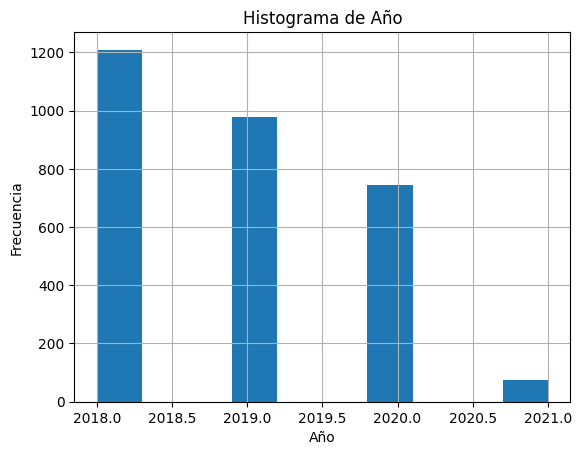

In [35]:
# Crear visualizaciones univariadas y multivariadas.
# grafico histograma de year
df["year"].hist()
plt.title("Histograma de Año")
plt.xlabel("Año")
plt.ylabel("Frecuencia")
plt.show()


Podemos ver que la mayor cantidad de automoviles estan entre los años 2011 y 2019 approx

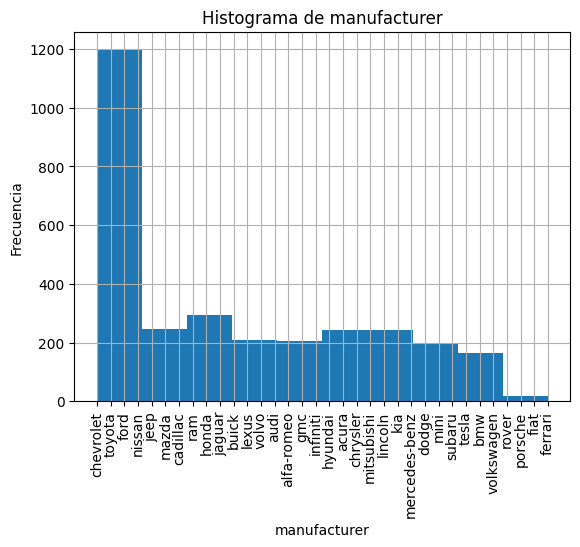

In [37]:
# grafico histograma de manufacturer
df["manufacturer"].hist()
plt.title("Histograma de manufacturer")
plt.xlabel("manufacturer")
plt.ylabel("Frecuencia")
plt.xticks(rotation=90)
plt.show()

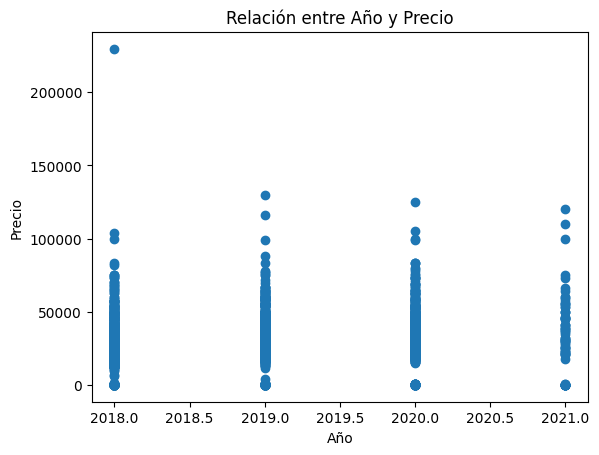

In [38]:
# grafico de correlacion entre year y price
plt.scatter(df["year"], df["price"])
plt.title("Relación entre Año y Precio")
plt.xlabel("Año")
plt.ylabel("Precio")
plt.show()

Como tenemos algunos datos atipicos, seguramente automoviles de alta gama, hay precios que no nos permitiran ver el detalle de la mayoria de los datos que se encuentran concentrado en la parte baja del grafico

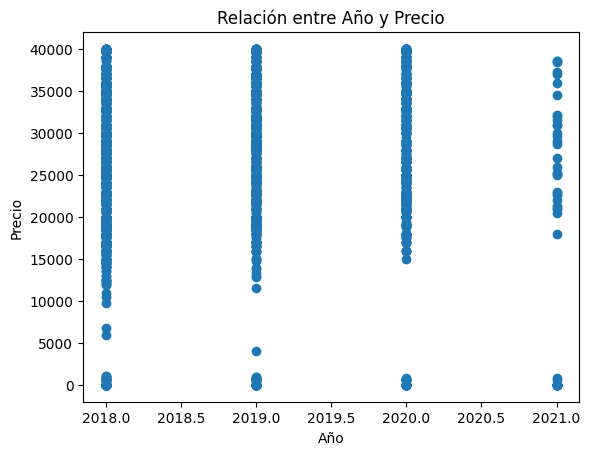

In [39]:
# grafico de correlacion entre year y price cuyo price no super los 40000
plt.scatter(df["year"][df["price"] < 40000], df["price"][df["price"] < 40000])
plt.title("Relación entre Año y Precio")
plt.xlabel("Año")
plt.ylabel("Precio")
plt.show()

Aca se puede ver una muestra con precios menores a 40.000

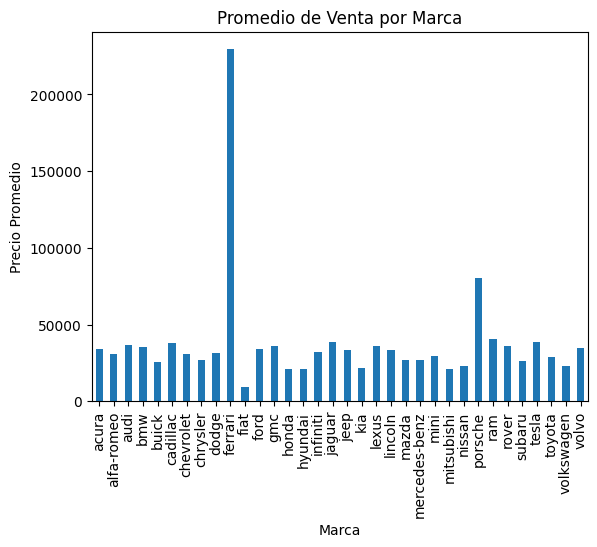

In [40]:
# Grafico de barra con el promedio de venta por manufacturer
df.groupby("manufacturer")["price"].mean().plot(kind="bar")
plt.title("Promedio de Venta por Marca")
plt.xlabel("Marca")
plt.ylabel("Precio Promedio")
plt.show()

### **4. Modelado y Evaluación:**

- Implementar al menos dos modelos de regresión (Linear - Regression y Random Forest Regressor).
- Evaluar los modelos utilizando MSE, RMSE, y R^2.
- Seleccionar el mejor modelo basado en las métricas de evaluación.

Lo primero que hare sera ascalar las variables numericas y transformar la variables categoricas

In [41]:
# divido mi DF en Train y Test
X = df.drop(columns="price")
y = df["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Clasifico las columnas
nom_cols = ["region", "manufacturer", "model", "fuel", "title_status", "transmission", "type", "state"]
num_cols = ["year", "odometer"]

In [43]:
# Definir transformadores.
preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), num_cols),
    ("nom", OneHotEncoder(handle_unknown='ignore'), nom_cols),
])

**Implementar al menos dos modelos de regresión (Linear - Regression y Random Forest Regressor).**

In [44]:
# Crear pipeline para Regresion Lineal.
pipeline_rl = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("regresion", LinearRegression())
])

In [45]:
# miro el pipeline
pipeline_rl

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['year', 'odometer']),
                                                 ('nom',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['region', 'manufacturer',
                                                   'model', 'fuel',
                                                   'title_status',
                                                   'transmission', 'type',
                                                   'state'])])),
                ('regresion', LinearRegression())])

In [46]:
# entreno el modelo Regresion Lineal
pipeline_rl.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['year', 'odometer']),
                                                 ('nom',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['region', 'manufacturer',
                                                   'model', 'fuel',
                                                   'title_status',
                                                   'transmission', 'type',
                                                   'state'])])),
                ('regresion', LinearRegression())])

In [47]:
# Crear pipeline para Ramdom Forest.
pipeline_rf = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("regresion", RandomForestRegressor())
])

In [48]:
# miro el pipeline de Ramdom Forest
pipeline_rf

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['year', 'odometer']),
                                                 ('nom',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['region', 'manufacturer',
                                                   'model', 'fuel',
                                                   'title_status',
                                                   'transmission', 'type',
                                                   'state'])])),
                ('regresion', RandomForestRegressor())])

In [49]:
# entreno el modelo de Ramdom Forest
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['year', 'odometer']),
                                                 ('nom',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['region', 'manufacturer',
                                                   'model', 'fuel',
                                                   'title_status',
                                                   'transmission', 'type',
                                                   'state'])])),
                ('regresion', RandomForestRegressor())])

**Evaluar los modelos utilizando MSE, RMSE, y R^2.**

In [50]:
# Predecir y evaluar modelo de Regresion Lineal
y_pred_rl = pipeline_rl.predict(X_test)

In [54]:
# obtengo MSE, RMSE, y R^2 de Regresion Lineal
mse_rl = mean_squared_error(y_test, y_pred_rl)
rmse_rl = np.sqrt(mse_rl)
r2_rl = r2_score(y_test, y_pred_rl)

print("Regresion Lineal")
print("MSE:", mse_rl)
print("RMSE:", rmse_rl)
print("R²:", r2_rl)

Regresion Lineal
MSE: 178265594.1587599
RMSE: 13351.613915881477
R²: 0.26665876947520273


In [52]:
# Predecir y evaluar modelo de Ramdom Forest
y_pred_rf = pipeline_rf.predict(X_test)

In [55]:
# obtengo MSE, RMSE, y R^2 de Ramdom Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Ramdom Forest")
print("MSE:", mse_rf)
print("RMSE:", rmse_rf)
print("R²:", r2_rf)

Ramdom Forest
MSE: 148417460.53564095
RMSE: 12182.670500987908
R²: 0.3894467204723694


### **5. Optimización del Modelo:**

- Optimizar el modelo seleccionado utilizando GridSearchCV.

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
# Optimizacion de hiperparametros para Regresion lineal
rl_params = {
    "regresion__n_jobs": [1, 2, 3, 4], # probamos con default, ahora lo hacemos con 1, 2, 3, 4.
}

rl_grid = GridSearchCV(pipeline_rl, rl_params, cv=3, scoring="r2")
rl_grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['year',
                                                                          'odometer']),
                                                                        ('nom',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['region',
                                                                          'manufacturer',
                                                                          'model',
                                                                          'fuel',
                                                                          'title_status',
                                                                          'transmission',
                                                                          'type',
                                                                          'state'])])),
                                       ('regresion', LinearRegression())]),
             param_grid={'regresion__n_jobs': [1, 2, 3, 4]}, scoring='r2')

In [58]:
# Evaluación Regresion lineal
rl_best = rl_grid.best_estimator_
y_pred_rl = rl_best.predict(X_test)

# Imprimo Evaluación.
print("RL Regressor")
print("Mejores parámetros:", rl_grid.best_params_)
print("R²:", r2_score(y_test, y_pred_rl))

RL Regressor
Mejores parámetros: {'regresion__n_jobs': 1}
R²: 0.26665876947520273


In [59]:
# Optimizacion de hiperparametros para Ramdom Forest
rf_params = {
    "regresion__n_estimators": [100, 200, 300], # probamos con 100, 200 y 300.
    "regresion__max_depth": [None, 10, 20, 30], # probamos con default, 10, 20 y 30.
}

rf_grid = GridSearchCV(pipeline_rf, rf_params, cv=3, scoring="r2")
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['year',
                                                                          'odometer']),
                                                                        ('nom',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['region',
                                                                          'manufacturer',
                                                                          'model',
                                                                          'fuel',
                                                                          'title_status',
                                                                          'transmission',
                                                                          'type',
                                                                          'state'])])),
                                       ('regresion', RandomForestRegressor())]),
             param_grid={'regresion__max_depth': [None, 10, 20, 30],
                         'regresion__n_estimators': [100, 200, 300]},
             scoring='r2')

In [60]:
# Evaluación Ramdom Forest
rf_best = rf_grid.best_estimator_
y_pred_rf = rf_best.predict(X_test)

# Imprimo Evaluación.
print("RF Regressor")
print("Mejores parámetros:", rf_grid.best_params_)
print("R²:", r2_score(y_test, y_pred_rf))




RF Regressor
Mejores parámetros: {'regresion__max_depth': None, 'regresion__n_estimators': 200}
R²: 0.39234326528325714


### **Conclusion**

Se puede apreciar que el modelo de regresion lineal, al tratar de mojorar tilizando el hiperparametro n_jobs, no tuvo resultados positivos, manteniendose en un 26% el R2

El Modelo de Ramdom Forest, al tratar de mejorar probando con hiperparametros n_estimator y max_depth tuvo un aumento en R2 de un 38% a un 39%, lo cual no es significativo